<a href="https://colab.research.google.com/github/iyungrozy/Image-morphology/blob/main/Skeletonization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skeletonization Objective
To implement the Zhang-Suen algorithm for image skeletonization and extract a one-pixel wide representation of the object's shape.

Menerapkan algoritma Zhang-Suen untuk skeletonisasi citra biner dan menghasilkan representasi satu piksel dari bentuk objek.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# import urllib.request

# Image Loading:

Read a binary image img in grayscale format (0 for background, other values for the object).
Define a structuring element element (e.g., a 3x3 cross shape) for erosion and dilation operations.

insert BW.png or any example image with same folder



# URL image

```
def get_image_from_url(url):
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
  return image

# Example usage
image_url = "https://www.example.com/image.jpg"  # Replace with your image URL
img = get_image_from_url(image_url)
```





In [ ]:
# Load the image
img = cv2.imread('BW.png', 0)

image processing refers to the process of converting a grayscale or color image into a binary image

In [ ]:
# Binarize the image
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

invert image gray color

In [ ]:
# Invert the image
binary = ~binary

# Zhang-Suen Algorithm:

Initialization:
`skel` = numpy array of zeros with the same size as img (to store the skeleton).
`done` = False (flag to stop iteration).

# Iteration:
While not done:
# Thinning:
Calculate the number of foreground (N_fg) and background (N_bg) neighbors for each pixel.
Remove foreground pixels that meet the criteria:


*   N_fg = 1
*   N_bg >= 2



Repeat the thinning step until no more pixels meet the criteria.
# Linking Correction:
Mark isolated foreground pixels.
Connect isolated pixels to the nearest object based on the pixel values in the neighborhood.
Check if all pixels have been processed (condition to stop iteration).

In [ ]:
# Function to track progress and perform skeletonization
def skeletonize(image):
  size = np.size(image)
  skel = np.zeros(image.shape, np.uint8)
  eroded_pixels = []  # List to store eroded pixel count each iteration

  ret, img = cv2.threshold(image, 127, 255, 0)
  element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
  done = False

  while not done:
    eroded = cv2.erode(img, element)
    eroded_pixels.append(size - cv2.countNonZero(eroded))  # Track eroded pixels
    temp = cv2.dilate(eroded, element)
    temp = cv2.subtract(img, temp)
    skel = cv2.bitwise_or(skel, temp)
    img = eroded.copy()

    zeros = size - cv2.countNonZero(img)
    if zeros == size:
      done = True

  return skel, eroded_pixels

In [ ]:
# Apply skeletonization
skeleton, eroded_pixel_counts = skeletonize(binary)

In [ ]:
# Plot the images
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

(-0.5, 175.5, 239.5, -0.5)

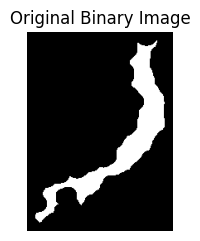

In [ ]:
# Plot original binary image
plt.subplot(1, 3, 1)
plt.imshow(binary, cmap='gray')
plt.title('Original Binary Image')
plt.axis('off')

# Output:

`skel` contains the skeleton representation of the image img.

(-0.5, 175.5, 239.5, -0.5)

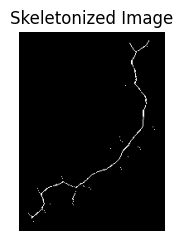

In [ ]:
# Plot skeletonized image
plt.subplot(1, 3, 2)
plt.imshow(skeleton, cmap='gray')  # Check if skeleton is uint8 now
plt.title('Skeletonized Image')
plt.axis('off')

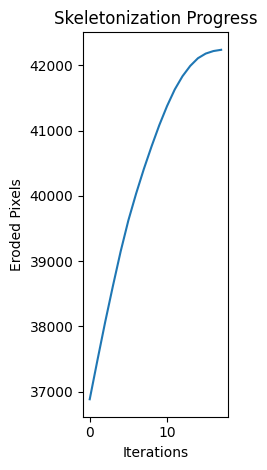

In [ ]:
# Plot progress chart (eroded pixels vs iterations)
plt.subplot(1, 3, 3)
plt.plot(range(len(eroded_pixel_counts)), eroded_pixel_counts)
plt.xlabel('Iterations')
plt.ylabel('Eroded Pixels')
plt.title('Skeletonization Progress')

plt.tight_layout()
plt.show()